In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

start_date = '2016-01-01'
end_date = '2022-12-31'
# start_date = '2016-07-01'
# end_date = '2022-12-31'

symbols = {
    'S&P 500': '^GSPC',
    'U.S. Bonds': 'AGG',
    'Bitcoin': 'BTC-USD',
    'Gold': 'GLD',
    'U.S. Real Estate': 'VNQ',
    'Oil': 'CL=F',
    'Emerging Market': 'EEM'
}


data = pd.DataFrame()
for name, symbol in symbols.items():
    asset_data = yf.download(symbol, start=start_date, end=end_date)['Close']
    asset_data.name = name
    data = pd.concat([data, asset_data], axis=1)

data.dropna(inplace = True)
    
correlation_matrix = data.corr()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
correlation_matrix

,S&P 500,U.S. Bonds,Bitcoin,Gold,U.S. Real Estate,Oil,Emerging Market
S&P 500,1.000000,0.090421,0.894646,0.851343,0.750027,0.658907,0.642165
U.S. Bonds,0.090421,1.000000,0.198540,0.335714,0.170018,-0.534599,0.369268
Bitcoin,0.894646,0.198540,1.000000,0.726827,0.738488,0.553090,0.692801
Gold,0.851343,0.335714,0.726827,1.000000,0.530691,0.361941,0.476009
U.S. Real Estate,0.750027,0.170018,0.738488,0.530691,1.000000,0.583270,0.474520
Oil,0.658907,-0.534599,0.553090,0.361941,0.583270,1.000000,0.310178
Emerging Market,0.642165,0.369268,0.692801,0.476009,0.474520,0.310178,1.000000


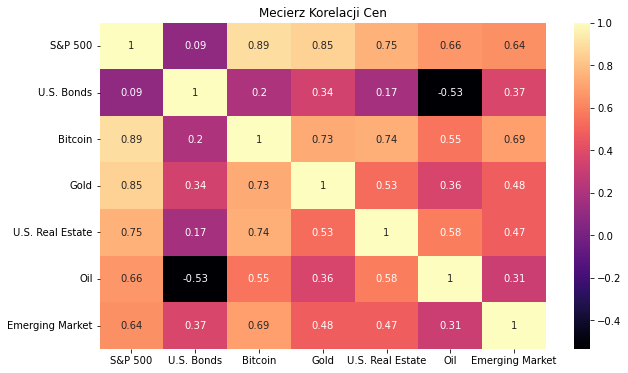

In [10]:

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='magma', annot=True)
plt.title('Mecierz Korelacji Cen')
plt.show()

In [11]:

start_date = '2016-01-01'
end_date = '2022-12-31'

symbols = {
    'S&P 500': '^GSPC',
    'U.S. Bonds': 'AGG',
    'Gold': 'GLD',
    'U.S. Real Estate': 'VNQ',
    'Oil': 'CL=F',
    'Emerging Market': 'EEM'
}

bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)['Close']

correlation_data = pd.DataFrame()

for name, symbol in symbols.items():
    asset_data = yf.download(symbol, start=start_date, end=end_date)['Close']
    yearly_correlations = []

    for year in range(bitcoin_data.index.year.min(), bitcoin_data.index.year.max() + 1):
        yearly_bitcoin = bitcoin_data[bitcoin_data.index.year == year]
        yearly_asset = asset_data[asset_data.index.year == year]
        yearly_data = pd.concat([yearly_bitcoin, yearly_asset], axis=1).dropna()
        correlation = yearly_data.iloc[:, 0].corr(yearly_data.iloc[:, 1])
        yearly_correlations.append(correlation)

    correlation_data[name] = yearly_correlations

correlation_data['Year'] = range(bitcoin_data.index.year.min(), bitcoin_data.index.year.max() + 1)
correlation_data.set_index('Year', inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
correlation_data

,S&P 500,U.S. Bonds,Gold,U.S. Real Estate,Oil,Emerging Market
Year,,,,,,
2016,0.803718,-0.015598,0.132343,0.335113,0.752218,0.602490
2017,0.870775,0.275379,0.329546,0.198045,0.602046,0.713346
2018,0.133044,0.699722,0.614317,-0.225235,0.255162,0.787871
2019,0.548336,0.810189,0.705737,0.682990,-0.032515,-0.256974
2020,0.768432,0.412350,0.507501,0.231126,0.336126,0.783486
2021,0.277894,-0.614669,-0.431008,0.177853,0.309595,-0.299327
2022,0.868535,0.847189,0.766325,0.884902,0.372135,0.875562


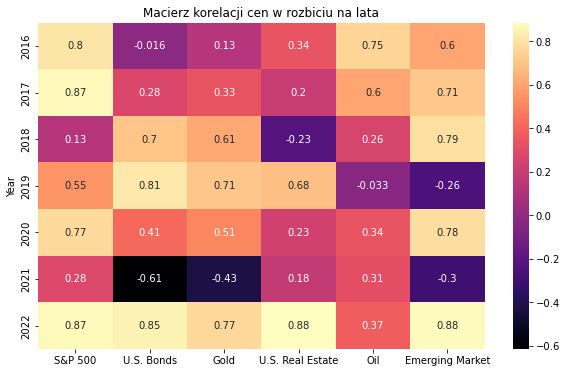

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, cmap='magma', annot=True)
plt.title('Macierz korelacji cen w rozbiciu na lata')
plt.show()

In [15]:
start_date = '2016-01-01'
end_date = '2022-12-31'

symbols = {
    'S&P 500': '^GSPC',
    'U.S. Bonds': 'AGG',
    'Bitcoin': 'BTC-USD',
    'Gold': 'GLD',
    'U.S. Real Estate': 'VNQ',
    'Oil': 'CL=F',
    'Emerging Market': 'EEM'
}

returns_data = pd.DataFrame()
for name, symbol in symbols.items():
    asset_data = yf.download(symbol, start=start_date, end=end_date)['Close']
    asset_returns = asset_data.pct_change().dropna()
    returns_data[name] = asset_returns

correlation_matrix = returns_data.corr()

correlation_matrix


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,S&P 500,U.S. Bonds,Bitcoin,Gold,U.S. Real Estate,Oil,Emerging Market
S&P 500,1.000000,0.102809,0.240928,0.042314,0.764112,0.148054,0.769262
U.S. Bonds,0.102809,1.000000,0.132256,0.364639,0.237283,0.021452,0.099491
Bitcoin,0.240928,0.132256,1.000000,0.112819,0.170310,0.053588,0.202868
Gold,0.042314,0.364639,0.112819,1.000000,0.127299,0.017607,0.129549
U.S. Real Estate,0.764112,0.237283,0.170310,0.127299,1.000000,0.127193,0.571435
Oil,0.148054,0.021452,0.053588,0.017607,0.127193,1.000000,0.141841
Emerging Market,0.769262,0.099491,0.202868,0.129549,0.571435,0.141841,1.000000


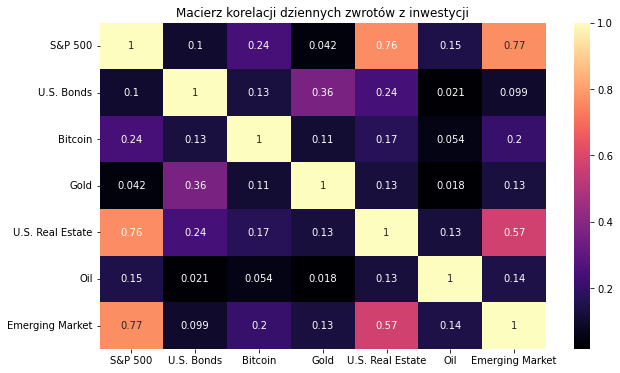

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='magma', annot=True)
plt.title('Macierz korelacji dziennych zwrotów z inwestycji')
plt.show()

In [19]:
start_date = '2016-01-01'
end_date = '2022-12-31'

symbols = {
    'S&P 500': '^GSPC',
    'U.S. Bonds': 'AGG',
    'Bitcoin': 'BTC-USD',
    'Gold': 'GLD',
    'U.S. Real Estate': 'VNQ',
    'Oil': 'CL=F',
    'Emerging Market': 'EEM'
}

returns_data = pd.DataFrame()
for name, symbol in symbols.items():
    asset_data = yf.download(symbol, start=start_date, end=end_date)['Close']
    asset_returns = asset_data.pct_change().dropna()
    returns_data[name] = asset_returns

correlation_data = pd.DataFrame()
for year in range(returns_data.index.year.min(), returns_data.index.year.max() + 1):
    yearly_returns = returns_data[returns_data.index.year == year]
    correlations = yearly_returns.corr()['Bitcoin'].drop('Bitcoin')
    correlation_data[year] = correlations

correlation_data = correlation_data.T

correlation_data



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,S&P 500,U.S. Bonds,Gold,U.S. Real Estate,Oil,Emerging Market
2016,-0.052547,0.066065,0.109557,-0.061324,-0.012731,-0.077808
2017,0.023414,0.027026,-0.024036,0.072840,-0.016728,-0.090526
2018,0.115083,-0.103285,0.015192,-0.036319,-0.003038,0.180844
2019,-0.059261,0.018257,0.155765,-0.008940,-0.038232,-0.057261
2020,0.418077,0.395690,0.327348,0.336431,0.132531,0.398297
2021,0.327415,0.011707,-0.008958,0.211310,0.102082,0.284854
2022,0.554693,0.178468,0.158013,0.413219,0.145489,0.495352


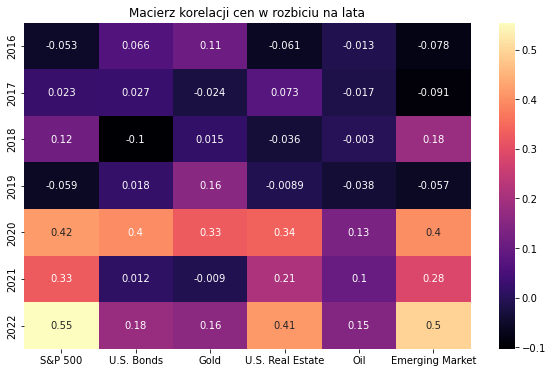

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, cmap='magma', annot=True)
plt.title('Macierz korelacji cen w rozbiciu na lata')
plt.show()